# Detector Acceptance and Efficiency

<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

In High Energy Physics (HEP), each particle collision is referred to as an *event*. When performing any measurement or search for new particles, we must rely on our detector's ability to correctly detect, identify, and reconstruct as many of these events as possible so that we can trace them back to the appropriate physics process (e.g. Higgs boson production).

It is greatly important for particle physicists to know how well their detector can achieve this. However, there is an immediate issue: In order to determine how well a detector can correctly detect and reconstruct events, we need to know what truly happened in these events so that we can compare with the detector's reconstruction of these events. Of course, we can't tell exactly what truly happened in these events, which is why we are using a detector to reconstruct them to begin with! How then can we determine the performance of our detector?

The trick is to produce *simulations* of these events, and then produce simulations of how the detector would reconstruct these events. In these simulated events, we know what truly happened and can compare that with the simulated reconstruction of the events. Using both of these simulated data, we can then determine the *expected* performance of our *real* detector. In particular, two parameters of interest that quantify the performance of a detector are its *acceptance* and *efficiency*. Before we define these two terms, we will first briefly discuss the typical simulations used in HEP experiments. (You can also read [this page](https://opendata.atlas.cern/docs/documentation/monte_carlo/MC_production_chain) for more details.) Once we have a good understanding of all of these concepts, we will then apply them by creating acceptance and efficiency histograms of an ATLAS experiment involving the decay of a Z boson into two muons!

## 1. Monte Carlo Simulations

Monte Carlo (MC) simulations are computer-generated models that mimic particle collisions as measured by a detector. In HEP experiments, they are used to theoretically model how particle collisions would look like inside a detector. These simulations take into account the complex physics of particle collisions, as well as the geometry and material properties of the detector itself. In addition, they also include approximations and assumptions about the physics processes and the detector response.

The figure below shows a flow chart outlining how real data from an actual experiment and MC simulated data are processed and then analyzed. In particular, we will focus our attention on the *event generator*, *detector simulation*, and *reconstruction* processes, as these steps will lead into our dicussion of a detector's acceptance and efficiency.

<CENTER><img src="../../13-TeV-examples/uproot_python/images/acceptance_and_efficiency_notebook/analysis_flow_chart.png" style="width:50%"></CENTER>

**Figure 1.** A flow chart of data processing of real and simulated data. Each box represents an algorithm for a specific process. The data formats are written next to the arrows. [Redrawn from <em>Practical Collider Physics</em>, Buckley et al. (2021) <a href="https://doi.org/10.1088/978-0-7503-2444-1">DOI</a>]

### 1.1 - Event Generation

In place of a collider, an MC simulation uses **event generator** programs to simulate the collisions of a particular experiment. These events are often called **truth events**, and the physical quantities collected from each event---such as the energy, momentum, and angles of each particle in each event---are stored and refered to as **truth variables**. Unlike in a real experiment in which you never know the true or exact values of each particle, the event generator outputs the exact particle properties as they would appear in nature.

### 1.2 - Detector Simulation

In place of a physical detector, an MC simulation uses a **detector simulation** to model the way particles from the collision (the output of the event generator) would propagate through and interact with the detector material. In the next step, it models how the detector would "see" those interactions as voltages, currents, and digital signals. The output of these steps closely resembles the raw data that comes from the real detector, but it still contains the output of the event generator (the true nature of the particles).

### 1.3 - Reconstruction

Once a detector has collected data from a collision, the data is fed into a **reconstruction** program that attempts to reconstruct the particles in the events that were recorded. Both the real and simulated data use the exact same reconstruction program, as indicated in the flow chart of Figure 1. 


At this point, we have the two essential kinds of (simulated) data needed to determine the performance of the detector: (1) the truth events, which gives information on the exact nature of the event; and (2) the reconstructed events, which tells us how those truth events might appear in the detector. From these two kinds of data, we can determine the acceptance and efficiency of the detector.

## 2. Detector Acceptance

The **acceptance** of a detector quantifies the geometrical and kinematical constraints of the detector, or of the selection being applied in an analysis. In other words, for a given event, the acceptance tells us whether the event can, in principle, be selected if the detector perfectly reconstructs all the particles it is capable of reconstructing. 

We define the acceptance by the following ratio:

$$ 
\text{Acceptance} = \frac{ \text{Number of truth events within detectable region} }{ \text{Total number of truth events} } 
$$

The values for acceptance range from 0 to 1, with 0 (or 0%) indicating that even a perfect detector would not detect any of the events, and 1 (or 100%) indicating that the detector can (ideally) detect all of the events within the detectable region. It is desirable to have as high an acceptance as possible as this would indicate that the detector is capable of collecting as many events as possible, providing more data and information about the physical process. By examinig the acceptance of the simulated events, we can then have an idea of how well our detector(s) can collect and select real events.

Common reasons that the acceptance of a detector might not be 100% include particles that are produced too close to the beams (where there is no instrumentation), or at too low momentum (where they cannot be reconstructed).

## 3. Detector Efficiency

The **efficiency** of a detector quantifies how well the detector can reconstruct the events that lie within its acceptance.

We define the efficiency of the detector by the following ratio:

$$ 
\text{Efficiency} = \frac{ \text{Number of successfully reconstructed events} }{ \text{Number of events within the acceptance of the detector} } 
$$

The values for efficiency normally range from 0 to 1, with 0 (or 0%) indicating that the detector cannot reconstruct any of the events, and 1 (or 100%) indicating that the detector can reconstruct every event. (It is also possible in some unusual cases to have an efficiency above 100%.) It is desirable to have as high an efficiency as possible, as this would indicate that the detector is capable of reconstructing as many events as possible. By examining the efficiency of the simulated events, we can then have an idea of how well our detector(s) can reconstruct real events.

Two common reasons that the efficiency of a detector might not be 100% are broken detector elements and regions without sensors (for example because there are support structures or cables in the way), often described as "holes" in the detector.

## ATLAS Open Data Initialisation

Now that we have learned these concepts, we are ready to apply them to ATLAS Open Data. The first step in doing this is to set everything up.

### Running a Python notebook

A Python notebook consists of cell blocks, each containing lines of Python code. Each cell can be run independently of each other, yielding respective outputs below the cells. Conventionally, cells are run in order from top to bottom.

- To run the whole notebook, in the top menu click Cell $\to$ Run All.

- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.

- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information, refer to [this page](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

### First time package installation on your computer (not needed on mybinder)

This first cell installs the required python packages. It only needs to be run the first time you open this notebook on your computer. If you close Jupyter and re-open on the same computer, you won't need to run this first cell again. If this is opened on mybinder, you don't need to run this cell.

In [ ]:
import sys
import os.path
!pip install atlasopenmagic
from atlasopenmagic import install_from_environment
install_from_environment()

We're going to import a number of packages to help us:
* `numpy`: provides numerical calculations such as histogramming
* `matplotlib`: common tool for making plots, figures, images, visualisations
* `uproot`: processes `.root` files typically used in particle physics into data formats used in python
* `awkward`: introduces `awkward` arrays, a format that generalizes `numpy` to nested data with possibly variable length lists
* `vector`: to allow vectorized 4-momentum calculations

In case these imports fail, try restarting the jupyter kernel and running again; it may simply be that the modules we installed in the previous cell have not yet been fully loaded.

In [1]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time # for printing time stamps
import requests # for file gathering, if needed; for HTTP access

In [2]:
# Get the files locally, rather than streaming the data (easier on the upstream servers)
local_files = True

Unit definitions, as stored in the data files:

In [3]:
MeV = 0.001
GeV = 1.0

# Case Study 1: $Z \rightarrow \mu \mu$

To reinforce the ideas of detector accepetance and efficiency, we will apply these concepts by creating acceptance and efficiency histograms for muons in the ATLAS experiment. We will use the [atlasopenmagic](https://opendata.atlas.cern/docs/data/atlasopenmagic) package to access the open data directly from the ATLAS OpenData Portal. The first step is import the module and load the release.

In [4]:
# ATLAS Open Data directory
import atlasopenmagic as atom
atom.available_releases()
atom.set_release('2025e-13tev-beta')

{'2016e-8tev': '2016 Open Data for education release for 8 TeV proton-proton '
               'collisions (https://opendata.cern/record/3860).',
 '2024r-pp': '2024 Open Data for research release for proton-proton collisions '
             '(https://opendata.cern/record/80020).',
 '2025e-13tev-beta': '2025 Open Data for education and outreach beta release '
                     'for 13 TeV proton-proton collisions '
                     '(https://opendata.cern.ch/record/93910).'}


We next choose the `skim` for our analysis. This places cuts into our data. However, in calculating the acceptance and efficiency we do not want to place any cuts. We therefore choose `noskim`.

In [5]:
# Select the skim to use for the analysis
skim = "noskim"

For convenient naming and identification purposes, we define a dictionary which stores all the important names of the samples we want to pull from the database. The datset ID's can be found here on [this page](https://opendata.atlas.cern/docs/data/for_education/13TeV25_metadata).

In [6]:
mc_defs = { r'mu_mu': {'dids': [700323,700324,700325]} } # Dataset ID's for the 2muon data we want to explore

mc_samples   = atom.build_mc_dataset(mc_defs, skim=skim, protocol='https')
data_samples = atom.build_data_dataset(skim, protocol='https')

samples = {**data_samples, **mc_samples}
samples.keys()

dict_keys(['Data', 'mu_mu'])

Let's try accessing the first file in the `mu_mu` dataset as an example.

In [7]:
# We will use the first entry in 'list', from the 'mu_mu' dataset
value = samples['mu_mu']['list'][0]
print(f"{value = }")

# We can keep this file URL to peek into it and understanding what our data looks like
mu_mu_file = value

value = 'https://opendata.cern.ch//eos/opendata/atlas/rucio/user/egramsta/mc_700323.Sh_2211_Zmumu_maxHTpTV2_BFilter.noskim.root'


The output `value` gives the URL link to the first sample in the mu_mu dataset (700323). This sample is stored in `mu_mu_file` and will be the sample that we will use throughout this case study. We now want to open this file to see what's inside. The file contains a `tree`, which contains multiple entries, each representing an event. For each event, a dictionary stores all relevant information with keys, such as the event number (`eventNumber`), the photon transverse momentum (`photon_pt`), and more. (More information on trees can be viewed [here]("https://masonproffitt.github.io/uproot-tutorial/03-trees/index.html").)

In [9]:
# Accessing the file from the online database (":analysis" opens the tree in a desired manner)
if local_files:
    
    # Download the file, use a local copy
    local_filename = mu_mu_file.split("/")[-1]
    print(f"Downloading {mu_mu_file} to {local_filename} ...")
    
    with requests.get(mu_mu_file, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
                
    tree = uproot.open(local_filename + ":analysis")
else: # Stream files
    tree = uproot.open(mu_mu_file + ":analysis")
    
# The number of entries in the tree can be viewed
print("\n The number of entries in the tree are:", tree.num_entries)

# The number of variables in the tree can be viewed
print("\n The number of variables in the tree is:", len(tree.keys()))


 The number of entries in the tree are: 3994786

 The number of variables in the tree is: 116


*Whoa*---that's a lot of entries and variables! Thankfully, we will only need very few variables in this analysis. A list of all the variables can be found [here](https://opendata.atlas.cern/docs/data/for_education/13TeV25_details#variable-list).  As we go along through this notebook, we will take the ones that we need from this list. 

Now that we understand how to access the information in this `tree`, we can begin the analysis. We will first consider the acceptance of this analysis, and then move on to efficiency.

## Acceptance of $Z \rightarrow \mu \mu$

In HEP, there can be millions and millions of collisions in our detector(s), and trying to collect and store each one can would quickly exceed available resources. Furthermore, not all collisions are relevant to a given analysis, especially those occurring near the edge of the detector, where the data quality is often poorer.

To reduce the dataset and focus on well-measured events, we apply **pre-selection requirements** to certain physics objects (see [this page](https://opendata.atlas.cern/docs/data/for_education/13TeV25_details#reconstructed-physics-objects)). For our analysis, each muon must satisfy the following pre-selection requirement:

$$ p_T > 7\text{ GeV} \text{ and } |\eta| < 2.5, $$

where $p_T$ is the transverse momentum of the muon, and $\eta$ is the [pseudo-rapidity](https://atlas.cern/glossary/rapidity) of the muon. 

❓**Question:** What is the expression for the acceptance for this analysis?

<p>
    
<details>

<summary>📌 <b>Click to reveal answer</b></summary>

In this case, the acceptance is given by
    
$$ 
\text{Acceptance} = \frac{ \text{Number of truth muons with $p_T > 7$ GeV and $|\eta| < 2.5$} }{ \text{Total number of truth muons} } 
$$ 

</details>

To calculate the acceptance, we therefore need to know the truth muons' transverse momentum $p_T$ and pseudo-rapidity $\eta$. These are stored in the `tree` as `truth_muon_pt` and `truth_muon_eta`. Later on, we will also need to know the muons azimuthal angle $\phi$, which are stored as `truth_muon_phi`, so we'll add it to the list as well. We can retrieve these variables from the `tree` in the following way:

In [10]:
# Define what variables are important to our analysis
muon_variables = ['truth_muon_pt', 'truth_muon_eta', 'truth_muon_phi']

# To see all the data for our given variables
tree.iterate(muon_variables, library="ak");

Now that we have taken the variables we need from the `tree`, we now have to create an `array` for each variable, which stores the values for each variable.

In [11]:
for array in tree.iterate(muon_variables, library="ak"):
    # Creating arrays for truth_muon_pt, truth_muon_eta, and truth_muon_phi variables
    muon_pt = array["truth_muon_pt"]
    muon_eta = array["truth_muon_eta"]
    muon_phi = array["truth_muon_phi"]

These three arrays contain the values of their respective variables in an event-by-event basis, as we can see by printing out the first 5 entries of the `muon_pt` array:

In [12]:
print("muon_pt:", muon_pt[:5])

muon_pt: [[68.7, 145], [27.3, 102], [121, 32.2], [202, 29.7], [18.3, 70.9]]


This is an array that contains sub-arrays, where each sub-array represents an event and contains the values of the transverse momentum for each muon in that event. Since we want to look at every muon across all events, it is more convenient to create new arrays that contains all of these values as one big list (that is, without the sub-arrays). This can be done by applying `ak.flatten` to each array.

In [13]:
# Flatten to treat all muons across all events as one big list
muon_pt_flat = ak.flatten(muon_pt)
muon_eta_flat = ak.flatten(muon_eta)
muon_phi_flat = ak.flatten(muon_phi)

Let us now look at the first 10 entries of the `muon_pt_flat` array:

In [14]:
print("muon_pt_flat:", muon_pt_flat[:10])

muon_pt_flat: [68.7, 145, 27.3, 102, 121, 32.2, 202, 29.7, 18.3, 70.9]


We now see that these are the first 10 values listed as in the `muon_pt` array, but without the sub-arrays.

Now that we have our three arrays of interest, there are two things we would like to do:

1. **We want to make a new array for each variable that contains values for *only* the muons that have passed the selection criteria.** This can be using a `mask` which goes into each array and sees which muons have passed the selection criteria. We can then apply this `mask` to each array, and store the values into new arrays.
<p>
2. **We want to calculate the acceptance.** Since the length of the arrays holding all the truth muons tells us how many truth muons in total there are and since the length of the arrays holding the accepted muons tells us how many of these muons made the selection criteria, we can just divide these two lengths to calculate the acceptance. 

We can do both of these in one shot by defining a *function* called `acceptance` that takes in three *parameters*: `pt_list`, which takes in a list of the $p_T$ values, `eta_list`, which takes in a list of the $\eta$ values, and `phi_list`, which takes in a list of the $\phi$ values. 

In [16]:
# Defining our acceptance function
def acceptance(pt_list, eta_list, phi_list):
    
    # Create boolean mask for accepted muons
    mask = (pt_list > 7) & (abs(eta_list) < 2.5)

    # Apply mask to get only accepted muons, and store them in a new array for each variable
    selected_pt = pt_list[mask]
    selected_eta = eta_list[mask]
    selected_phi = phi_list[mask]

    # Calculate acceptance using the lengths of one of the original arrays and one of the selected arrays created
    acceptance = len(selected_pt) / len(pt_list)
    
    # Print useful information, as well as the acceptance
    print(f"Total number of truth muons: {len(pt_list)}")
    print(f"Number of truth muons within selection criteria: {len(selected_pt)}")
    print(f"Acceptance: {acceptance:.4f}")
    
    # Return the new arrays created by the mask so we can use them later
    return selected_pt, selected_eta, selected_phi

We now call our function in the following way to create arrays of the selected truth muons, as well as print out what our acceptance is:

In [17]:
# Calling our acceptance function
selected_pt, selected_eta, selected_phi = acceptance(muon_pt_flat, muon_eta_flat, muon_phi_flat)

Total number of truth muons: 2287618
Number of truth muons within selection criteria: 1956152
Acceptance: 0.8551


Let's breakdown what this means: Out of the 2,287,618 muons produced by the MC simulation, 1,956,152 of them were within the selection criteria of the MC detector simulation. This means that our acceptance value is 0.8551, or 85.51\%. How neat!

Furthermore, we now have an array that contains the values for each variable for the muons within the selection criteria:  `selected_pt`, `selected_eta`, and `selected_phi`.

Now that we know what our acceptance is, we now want to know why it is this value. Ideally, of course, we would want our acceptance to be at 100%. Why isn't our acceptance at 100%? What is preventing our acceptance to be higher? A nice way to answer these questions is to look at **histrograms**, which are plots that show how your variables are distributed. In this analysis, we will look at *2D histograms*, which shows how *two variables* are distributed.  

### 📊 Acceptance Histogram 1: Truth Muon $p_T$ Distribution 

Recall that the `muon_pt` array shows the transverse momentum for each muon for each event:

In [18]:
print("muon_pt:", muon_pt)

muon_pt: [[68.7, 145], [27.3, 102], [121, 32.2], ..., [...], [27.9, 33.9], [42.8, 47.9]]


For our first histrogram, we would like to see how the transverse momentum for the first and second muon in each event is distributed. That is, we want to make a histrogram of `muon_pt[0]` vs. `muon_pt[1]` for each event. Before doing this, we must first require each event to have at least two muons. If an event has more than two, we will just consider the first two. If it has less than two, then we do not consider those events. Let's check to see how many events there are in total, and how many events have less than two muons:

In [19]:
print("Total events:", len(muon_pt))
print("Events with < 2 muons:", ak.sum(ak.num(muon_pt) < 2))

Total events: 1131348
Events with < 2 muons: 71299


We see that out of the 1,131,348 events, 71,299 of them have less than two muons. Therefore, in order to make our 2D histrogram, we must be sure to select only the events that have at least two muons. We can do this by again using `mask` to return the number of muons in each event. We can then apply this `mask` to `muon_pt` so that it selects *only* the events that contain at least 2 muons. Once we have these events, we can then use go into each event to take the first and second muon's $p_T$ value; this is called **slicing**. We then convert these `ak` arrays into `numpy` arrays so that we can make the 2D histrogram.

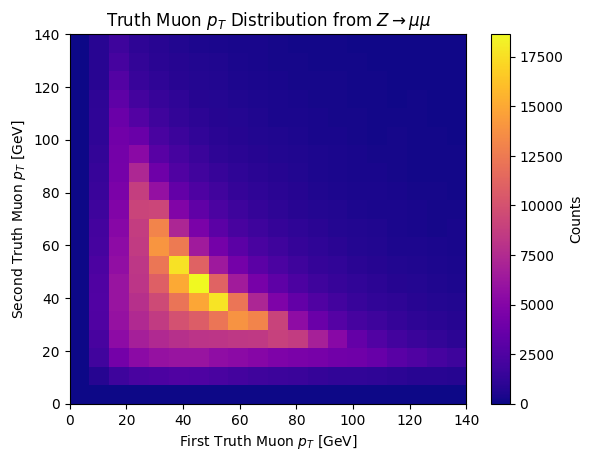

In [20]:
# Create a mask for events that have at least 2 muons
mask = ak.num(muon_pt) >= 2

# Apply the mask to select only the events that have at least 2 muons
valid_pt = muon_pt[mask]

# Slice out first and second muon's values for each event
first_muon_pt = valid_pt[:, 0]
second_muon_pt = valid_pt[:, 1]

# Convert to numpy arrays to make the histogram
x = ak.to_numpy(second_muon_pt)
y = ak.to_numpy(first_muon_pt)

# Define bins
x_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)
y_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("First Truth Muon $p_T$ [GeV]")
plt.ylabel("Second Truth Muon $p_T$ [GeV]")
plt.colorbar(label="Counts")
plt.title(r"Truth Muon $p_T$ Distribution from $Z \to \mu\mu$")
plt.show()

🤔 **What do you notice here?** Take a look at this plot, and try to think about what it means to you. Write down any features of this plot that you see, and try to think about what they mean and what this plot is showing. Once you're ready, click below to reveal the important features of this plot.

<p>
    
<details>

<summary>📌 <b>Click to reveal answer</b></summary>

Here are some important features of this plot and what it means:
    
* There doesn't seem to be a lot of muons with $p_T < 7$ GeV. This suggests that the first selection criteria ($p_T > 7$ GeV) does not lower our acceptance very much. 
<p>   
* The upper right corner of the plot is pretty empty. This means that for a given event, we aren't very likely to find two muons that both have high transverse momentum. Generally, we see that if one muon has a high transverse momentum, then the other has a low transverse momentum.    
<p>   
* The most counts (the brightest spot) occurs when both muons have a transverse momentum of about 45 GeV. The Z boson has a mass of about 90 GeV. Thus, most muons are produced with the Z boson at rest, and the mass of the Z boson is roughly equally shared between the two muons as their momentum. 
    
    This is a result of conservation of energy and momentum. The relationship between energy $E$ and momentum $p$ for a high-speed particle of mass $m$ is given by
    $$ E = \sqrt{m^2 + p^2}. $$
    The momentum of the $Z$ boson at rest is $p_Z=0$, so we find from the above equation that $E_Z = m_Z \approx 90\text{ GeV}$. By conservation of momentum, the two muons that are produced by the decay of the $Z$ boson must have a total momentum equal to zero, which means that they must have equal and opposite momentum ($\vec{p}_{2\mu} = -\vec{p}_{1\mu}$). Since both muons have the same mass and magnitude of momentum ($|\vec{p}_{1\mu}| = |\vec{p}_{2\mu}| = p_\mu$), they both have the same energy ($E_{1\mu} = E_{2\mu} = E_\mu$). Furthermore, since the mass of the muon is very small, the energy of the two muons are roughly the same as their momentum: $E_\mu \approx p_\mu$. Therefore, by conservation of energy, we have
    $$ E_Z = E_\mu + E_\mu = 2E_\mu \hspace{0.5cm} \text{or} \hspace{0.5cm} E_\mu = \frac{E_z}{2} = \frac{90\text{ GeV}}{2} = 45\text{ GeV}. $$

</details>

### 📊 Acceptance Histogram 2: Second Truth Muon $p_T$ and $\eta$ Distribution

For our second histrogram, we would like to see how the transverse momentum and pseudo-rapidity for the second muon is distributed for each event. This process is similar to how we got our first histrogram, except now we must `mask` both `muon_pt` *and* `muon_eta` at the same time to make sure we don't mismatch events.

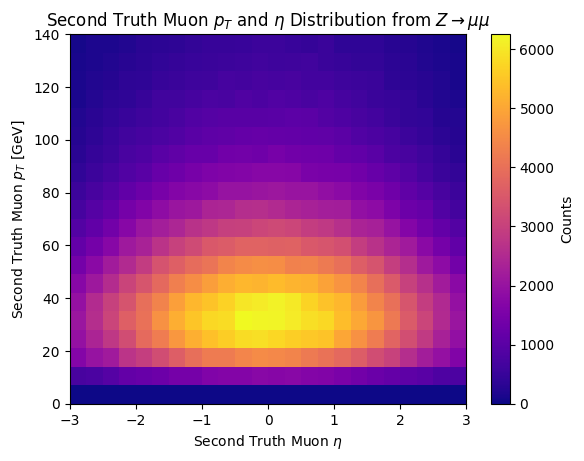

In [21]:
# Create a mask for events that have at least two muons for both arrays
mask = (ak.num(muon_pt) >= 2) & (ak.num(muon_eta) >= 2)

# Apply the mask to select only the events that have at least 2 muons
valid_pt = muon_pt[mask]
valid_eta = muon_eta[mask]

# Slice out second muon's values for each event
second_muon_pt = valid_pt[:, 1]
second_muon_eta = valid_eta[:, 1]

# Convert to numpy arrays to make the histogram
x = ak.to_numpy(second_muon_eta)
y = ak.to_numpy(second_muon_pt)

# Define bins
x_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)
y_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Second Truth Muon $\eta$")
plt.ylabel("Second Truth Muon $p_T$ [GeV]")
plt.colorbar(label="Counts")
plt.title(r"Second Truth Muon $p_T$ and $\eta$ Distribution from $Z \to \mu\mu$")
plt.show()

🤔 **What do you notice here?** Take a look at this plot, and try to think about what it means to you. Write down any features of this plot that you see, and try to think about what they mean and what this plot is showing. Once you're ready, click below to reveal the important features of this plot.

<p>

<details>

<summary>📌 <b>Click to reveal answer</b></summary>

Here are some important features of this plot and what it means:
    
* Just as before, we see that there are practically no muons with $p_T < 7$ GeV. However, there are a good amount of muons with $\eta > 2.5$ and $\eta < -2.5$. This tells us that it is the second criterion ($|\eta| < 2.5$) that reduces the amount of muons being selected. In other words, it is this criterion that contributes the most to a lower acceptance value.
    
<p>

* Most muons are produced at an angle of $\eta = 0$.
    
<p>

* The plot looks very symmetric about the $\eta = 0$ axis. This reflects the fact that the LHC smashes two protons together, both of which are heading at each other at the same speed; in other words, the collisions are symmetric, so we expect the angles of the outgoing particles to be symmetric as well. 

</details>

## Efficiency of $Z \rightarrow \mu \mu$

Having understood the acceptance we are now ready to consider the efficiency, which is about trying to answer the question: "How likely will my detector reconstruct a particle that looks like this?" To answer this question, we will calculate the efficiency and make lots of 2D histograms.

### 📊 Efficiency Histogram 1: Selected Truth Muon $p_t$ and $\eta$ Distribution

The first histogram we will look at is the distribution of the transverse momentum and pseudo-rapidity for the selected truth muons. To this end, we will use the `selected_pt` and `selected_eta` arrays that we made.

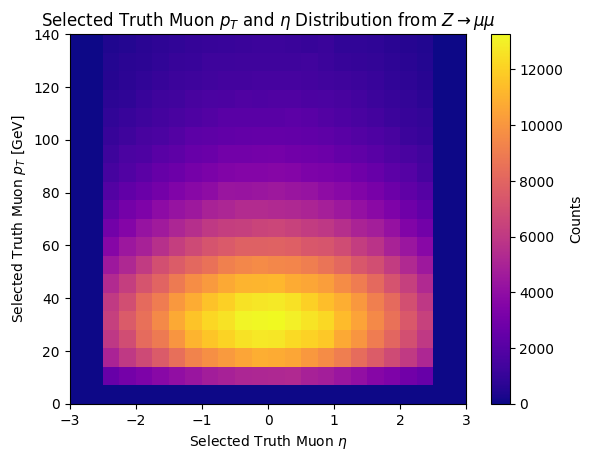

In [22]:
# Convert to numpy arrays to make the histogram
x = ak.to_numpy(selected_eta)
y = ak.to_numpy(selected_pt) 

# Define bins
x_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)
y_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Selected Truth Muon $\eta$")
plt.ylabel("Selected Truth Muon $p_T$ [GeV]")
plt.colorbar(label="Counts")
plt.title(r"Selected Truth Muon $p_T$ and $\eta$ Distribution from $Z \to \mu\mu$")
plt.show()

This is similar to the second acceptance histogram we made, except now we're considering all the muons within the selection criteria.

### 📊 Efficiency Histogram 2: Selected Truth Muon $\eta$ and $\phi$ Distribution

The next histogram we will look at is the distribution of the pseudo-rapidity and transverse momentum for the selected truth muons. To this end, we will use the `selected_eta` and `selected_phi` arrays.

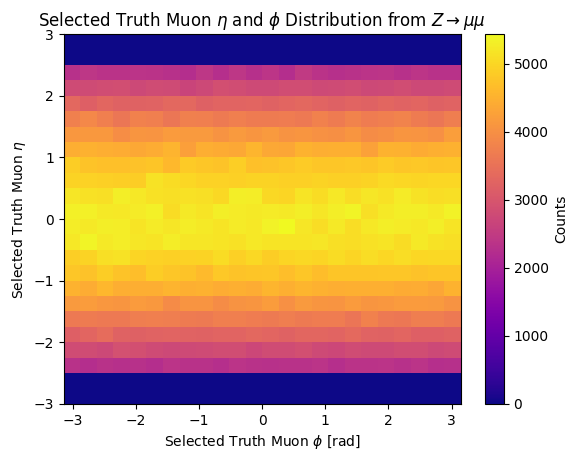

In [23]:
# Convert to numpy arrays to make the histogram
x = ak.to_numpy(selected_phi) 
y = ak.to_numpy(selected_eta)

# Define bins
x_bin = np.linspace(-np.pi, np.pi, 25) # 24 bins from -pi to pi
y_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Selected Truth Muon $\phi$ [rad]")
plt.ylabel("Selected Truth Muon $\eta$")
plt.colorbar(label="Counts")
plt.title(r"Selected Truth Muon $\eta$ and $\phi$ Distribution from $Z \to \mu\mu$")
plt.show()

### Particle Reconstruction and Matching

Before we can calculate the efficiency, we first need to talk about how particle's are reconstructed. In particle reconstruction, we are often interested only in the direction a particle went in, regardless of its momentum. Each direction is associated with a single point on a cylinder surrounding the beam pipe, as shown in **Figure 2(a)**. Each point can be specified by the pseudo-rapidity $\eta$ and azimuthal angle $\phi$ of the particle. To visulize this better, we can "unwrap" this cylinder and form a plane whose coordinates are $(\eta, \phi)$, as shown in **Figure 2(b)**. In this plane, each point represents a possible direction of a particle in the detector. If we are given two points, we can define a distance between them:

$$ dR^2 = (\eta_1 - \eta_2)^2 + (\phi_1 - \phi_2)^2. $$

This is similar to finding the distance between two points in the $xy$-plane, for which $d^2 = (x_1 - x_2)^2 + (y_1 - y_2)^2$. In this case, the quantity $dR$ is a measure of the angular closeness of two particles.

This equation is extremely useful for particle reconstruction. Suppose $\eta_1$ and $\phi_1$ are the direction angles for a truth muon, while $\eta_2$ and $\phi_2$ are the direction angles for a reconstructed muon. If we find their angular distance to be $dR < 0.1$, we say that we have successfully reconstructed the muon and that the truth muon is matched to this reconstructed muon. This process is called **matching**.

<CENTER><img src=\"../../13-TeV-examples/uproot_python/images/acceptance_and_efficiency_notebook/matching.png\" style=\"width:50%\"></CENTER>

**Figure 2.** **(a)** Each particle direction passes through a cylindrical surface surrounding the beam pipe at a single point. **(b)** We can unwrap this cylinder and use coordinates $(\eta, \phi)$ in the resulting plane. Given two points, we can define the distance $dR$ between them on this plane. [Adapted from <em>Practical Collider Physics</em>, Buckley et al. (2021) <a href="https://doi.org/10.1088/978-0-7503-2444-1">DOI</a>]

<span style="color:red;"><b>Caution:</b></span> In calculating $dR$ we must be *very* careful in calculating the difference in $\phi$ angles. The values of $\phi$ lie in the range $[-\pi, \pi]$, but $\phi$ is a *periodic* function. As a result, taking a difference of two $\phi$ angles may end up outside this range and so will give a larger separation distance than required. For example, suppose we have $\phi_1 = -3.14$ (which is really close to $-\pi$) and $\phi_2 = +3.14$ (which is really close to $+\pi$). The angles $-\pi$ and $+\pi$ represent the same point, so these two points must be really close to each other. However, if we take the difference we get

$$ \phi_1 - \phi_2 = -3.14 - (+3.14) = -6.28. $$

This difference seems to suggest that the distance between these two points is really big! The issue is that this value is outside the $[-\pi, \pi]$ range. Since adding (or subtracting) by $2\pi$ gives the same point, we can add (or subtract) by $2\pi$ until our difference is in the right range. In this case, adding $2\pi$ once to this difference will bring it to the correct range:

$$ -6.28 + 2\pi = 0.003. $$

This gives the correct separation distance between the two angles.

❓**Question.** What is the expression for the efficiency for this analysis?

<p>

<details>

<summary>📌 <b>Click to reveal answer</b></summary>

In this case, the efficiency is given by
    
$$ 
\text{Efficiency} = \frac{ \text{Number of truth muons with $dR < 0.1$} }{ \text{Number of truth muons with $p_T > 7$ GeV and $|\eta| < 2.5$} } 
$$ 

</details>

We have already found the number of truth muon with $p_T > 7$ GeV and $|\eta| < 2.5$; this was given by `len(selected_pt)`. We therefore only need to determine the number of matched muons. To do this, we will need the following set of variables:

* `lep_pt`: transverse momentum of the tau lepton
* `lep_eta`: pseudo-rapidity of the tau lepton
* `lep_phi`: azimuthal angle of the tau lepton
* `lep_type`: number signifying the lepton type (11 for electrons and 13 for muons)

Similar to how we obtain our previous arrays for the truth muons, we first define the variables we like to consider, create `ak` arrays for each variable, and then flatten them using `ak.flatten`.

In [24]:
# Define what variables are important to our analysis
lep_variables = ['lep_pt', 'lep_eta', 'lep_phi', 'lep_type']

# To see all the data for our given variables
tree.iterate(lep_variables, library="ak");

In [25]:
# Creating arrays for truth_muon_pt and truth_muon_eta
for array in tree.iterate(lep_variables, library="ak"):
    lep_pt = array["lep_pt"]
    lep_eta = array["lep_eta"]
    lep_phi = array["lep_phi"]
    lep_type = array["lep_type"]

    # Flatten to treat all muons across all events as one big list
    lep_pt_flat = ak.flatten(lep_pt)
    lep_eta_flat = ak.flatten(lep_eta)
    lep_phi_flat = ak.flatten(lep_phi)
    lep_type_flat = ak.flatten(lep_type)

The first three arrays we have made---`lept_pt`, `lep_eta`, and `lep_phi` are the similar to that for the truth muons, except now they are the values for the leptons created in real particle collisions! We can see how many of these are electrons and how many are muons using the `lep_type_flat` array:

In [27]:
print("Total leptons:", len(lep_type_flat))
print("Number of electrons:", ak.sum(lep_type_flat == 11))
print("Number of muons:", ak.sum(lep_type_flat == 13))

Total leptons: 1597580
Number of electrons: 65329
Number of muons: 1532251


Since we only want to consider muons in this analysis, we apply a `mask` to all the lepton arrays that selects only the values corresponding to muons:

In [28]:
# Create a mask to select only muons (13)
mask = (lep_type_flat) == 13

# Apply the mask to each array
lep_muon_pt = lep_pt_flat[mask]
lep_muon_eta = lep_eta_flat[mask]
lep_muon_phi = lep_phi_flat[mask]

We will now define an `efficiency` function that does the following:

* Ensures that differences in $\phi$ angles are in the correct range, $[-\pi, \pi]$. This can be done by defining a function called `wrap_phi` which takes the difference between the angles and will add or subtract until the difference is within the correct range.
<p>
* For each truth muon, calculate $dR$ for every reconstructed muon in the event to see if it matches ($dR < 0.1$), making sure to not repeat (double-match) any of the muons. All of these combinations can be done using `cKDTree`.
<p>
* Creates new arrays for each truth muon variable that contains the values for only those that were matched to a reconstructed muon. We will call these new arrays `matched_pt`, `matched_eta`, and `matched_phi`.
<p>
* Computes the efficiency using the appropriate array lengths.

In [29]:
from scipy.spatial import cKDTree

def efficiency(muon_pt, muon_eta, muon_phi, lep_eta, lep_phi, dr_threshold=0.1):
    """
    Matches muons to leptons using delta R < threshold.
    Returns arrays of matched muon kinematics.

    Parameters:
        muon_pt, muon_eta, muon_phi: arrays of muon kinematics
        lep_eta, lep_phi: arrays of lepton kinematics
        dr_threshold: delta R matching threshold (default = 0.1)

    Returns:
        matched_eta, matched_phi, matched_pt: arrays of matched muons
    """

    # Step 1: Wrap phi values into [-pi, pi] using while loop
    def wrap_phi(phi_array):
        wrapped = []
        
        for phi in phi_array:
            
            while phi > np.pi: # If phi > pi, keep subtracting 2pi until it is within -pi to +pi
                phi -= 2 * np.pi
                
            while phi < -np.pi: # If phi < -pi, keep adding 2pi until it is within -pi to +pi
                phi += 2 * np.pi
                
            wrapped.append(phi)
        return np.array(wrapped)

    muon_phi = wrap_phi(muon_phi)
    lep_phi  = wrap_phi(lep_phi)

    # Step 2: Build KDTree from lepton eta/phi
    lepton_tree = cKDTree(np.column_stack((lep_eta, lep_phi)))

    # Step 3: Query nearest lepton to each muon
    distances, indices = lepton_tree.query(
        np.column_stack((muon_eta, muon_phi)),
        distance_upper_bound=dr_threshold)

    # Step 4: Track one-to-one matches
    matched_leptons = set()
    matched_muon_indices = []

    for muon_idx, (dR, lep_idx) in enumerate(zip(distances, indices)):
        if dR != np.inf and lep_idx not in matched_leptons:
            matched_muon_indices.append(muon_idx)
            matched_leptons.add(lep_idx)

    # Step 5: Extract matched muons
    matched_pt  = muon_pt[matched_muon_indices]
    matched_eta = muon_eta[matched_muon_indices]
    matched_phi = muon_phi[matched_muon_indices]

    # Step 6: Compute efficiency
    efficiency = len(matched_muon_indices) / len(muon_pt)

    print(f"Number of muons matched: {len(matched_muon_indices)}")
    print(f"Number of truth muons within selection criteria: {len(muon_pt)}")
    print(f"Efficiency: {efficiency:.4f}")

    return matched_pt, matched_eta, matched_phi

We now call our function in the following way to create arrays of the matched truth muons, as well as print out what our efficiency is:

In [30]:
matched_pt, matched_eta, matched_phi = efficiency(selected_pt, selected_eta, selected_phi, lep_muon_eta, lep_muon_phi)

Number of muons matched: 1489486
Number of truth muons within selection criteria: 1956152
Efficiency: 0.7614


Let's breakdown what this means: Out of the 1,956,152 truth muons that are within the selection criteria, 1,489,486 of them were matched up with a reconstructed muon. This means our efficiency is 0.7614, or 76.14\%. How neat!

Furthermore, we now have an array that contains the values for each variable for the matched muons:  `matched_pt`, `matched_eta`, and `matched_phi`.

### 📊 Efficiency Histogram 3: Matched Truth Muon $p_T$ and $\eta$ Distribution

The third histogram we will look at is the distribution of the transverse momentum and pseudo-rapidity for the matched truth muons. To this end, we will use the `matched_pt` and `matched_eta` arrays that we just made in our `efficiency` function.

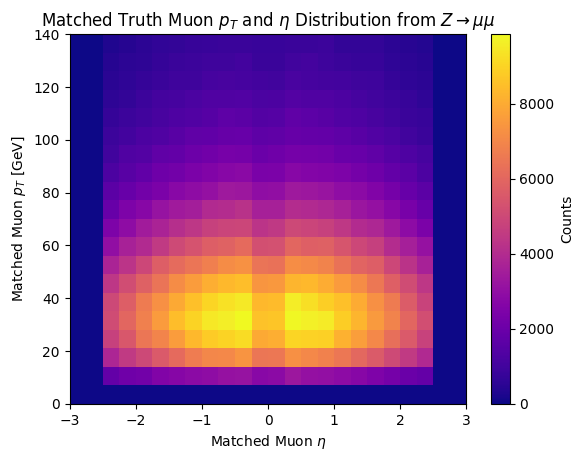

In [31]:
# Convert to numpy arrays to make the histogram
x = ak.to_numpy(matched_eta)
y = ak.to_numpy(matched_pt) 

# Define bins
x_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)
y_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Matched Muon $\eta$")
plt.ylabel("Matched Muon $p_T$ [GeV]")
plt.colorbar(label="Counts")
plt.title(r"Matched Truth Muon $p_T$ and $\eta$ Distribution from $Z \to \mu\mu$")
plt.show()

❓**Question.** How does this histogram compare to the one we made using the selected truth muons (Efficiency Histogram 1)?

<p>
    
<details>

<summary>📌 <b>Click to reveal answer</b></summary>

It looks very similar to the previous histrogram, except this one has less counts along the $\eta=0$ axis. This seems to suggest that the detector has a harder time reconstructing particles along this area.
    
</details>

### 📊 Efficiency Histogram 4: Matched Truth Muon $\eta$ and $\phi$ Distribution

The fourth histogram we will look at is the distribution of the pseudo-rapidity and azimuthal angle for the matched truth muons. To this end, we will use the `matched_eta` and `matched_phi` arrays that we just made in our `efficiency` function.

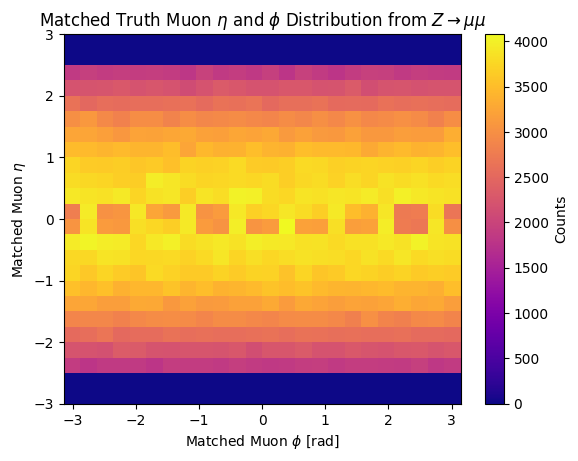

In [32]:
# Convert to numpy arrays to make the histogram
x = ak.to_numpy(matched_phi) 
y = ak.to_numpy(matched_eta)

# Define bins
x_bin = np.linspace(-np.pi, np.pi, 25) # 24 bins from -pi to pi
y_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Matched Muon $\phi$ [rad]")
plt.ylabel("Matched Muon $\eta$")
plt.colorbar(label="Counts")
plt.title(r"Matched Truth Muon $\eta$ and $\phi$ Distribution from $Z \to \mu\mu$")
plt.show()

❓**Question.** How does this histogram compare to the one we made using the selected truth muons (Efficiency Histogram 2)?
<p>
    
<details>

<summary>📌 <b>Click to reveal answer</b></summary>

It looks very similar, except this one has fewer counts along the $\eta=0$ axis. Again, this seems to suggest that fewer muons are reconstructed in this area. 
    
</details>

### 📊 Efficiency Histogram 5: Muon Reconstruction Probability as a Function of $p_T$ and $\eta$

We have made two histograms showing the distribution of $p_T$ and $\eta$: one for all the selected muons (Efficiency Histogram 1), and one for all the matched muons (Efficiency Histogram 3). If we divide histogram 3 by histrogram 1, we then obtain another histogram which gives the probability for reconstructing a muon for a given $p_T$ and $\eta$ bin. For this histogram, we will halve the bin size so we can see more features.

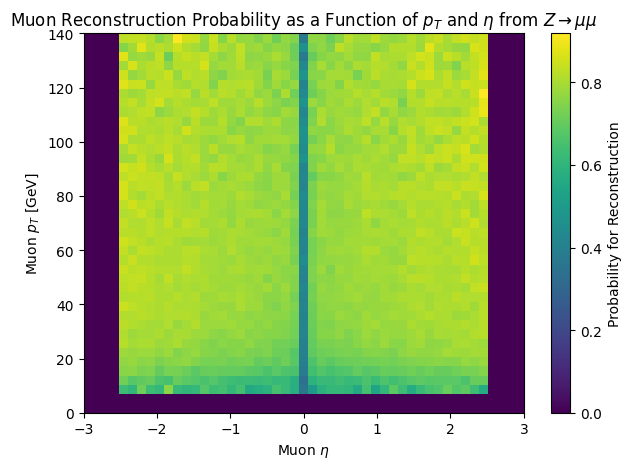

In [33]:
# Convert to numpy arrays
x_matched = ak.to_numpy(matched_eta)
y_matched = ak.to_numpy(matched_pt)

x_all = ak.to_numpy(selected_eta)
y_all = ak.to_numpy(selected_pt)

# Define bins
x_bin = np.linspace(-3, 3, 2*25) # 48 bins from -3 to 3 (bin width = 0.125)
y_bin = np.linspace(0, 140, 2*21) # 40 bins from 0 to 140 GeV (bin width = 3.5 GeV)

# 2D histograms: returns counts in each bin
matched_counts, _, _ = np.histogram2d(x_matched, y_matched, bins=[x_bin, y_bin])
all_counts, _, _     = np.histogram2d(x_all, y_all, bins=[x_bin, y_bin])

# Compute probability
with np.errstate(divide='ignore', invalid='ignore'):
    probability = np.true_divide(matched_counts, all_counts)
    probability[~np.isfinite(probability)] = 0  # set NaN and inf to 0

# Plot the histogram
X, Y = np.meshgrid(x_bin, y_bin, indexing='ij')  # mesh for pcolormesh

pcm = plt.pcolormesh(X, Y, probability, cmap='viridis', shading='auto')
plt.colorbar(pcm, label="Probability for Reconstruction")
plt.xlabel("Muon $\eta$")
plt.ylabel("Muon $p_T$ [GeV]")
plt.title(r"Muon Reconstruction Probability as a Function of $p_T$ and $\eta$ from $Z \to \mu\mu$")
plt.tight_layout()
plt.show()

🤔 **What do you notice here?** Take a look at this plot, and try to think about what it means to you. Write down any features of this plot that you see, and try to think about what they mean and what this plot is showing. What do you think the blue line means? Once you're ready, click below to reveal the important features of this plot.

<p>

<details>

<summary>📌 <b>Click to reveal answer</b></summary>

This plot tells us the probability that our detector can reconstruct a muon for each bin. The bright spots show areas with high probabilities (the conditions you are most likely to reconstruct a particle), and the dark spots show areas with low probabilities (the conditions you are most unlikely to reconstruct a particle). These dark spots are often called the "holes" of the detector.
    
In the purple area to the far left, far right, and bottom of the plot, the probability is zero. This makes sense, since we know that our detector is unable to detect (and therefore reconstruct) particles that are outside the selection criteria ($p_T > 7$ GeV and $|\eta| < 2.5$). As $p_T$ increases, the probability increases, which indicates that our detector has an easier time reconstructing particles with higher transverse momentum. One of the more interesting features of this plot is the blue line along the $\eta = 0$ axis. This means that the probability of reconstructing a particle along this line is pretty low. It turns out that our detector has cables along this line, so we cannot put any sensors along this line. As a result, we are unable to reconstruct particle along this line very well.

</details>

### 📊 Efficiency Histogram 6: Muon Reconstruction Probability as a Function of $\eta$ and $\phi$

We have made two histograms showing the distribution of $\eta$ and $\phi$: one for all the selected muons (Efficiency Histogram 2), and one for all the matched muons (Efficiency Histogram 4). If we divide histogram 4 by histogram 2, we then obtain another histogram which gives the probability for reconstructing a muon for a given $\eta$ and $\phi$ bin. For this histogram, we will halve the bin size so we can see more features.

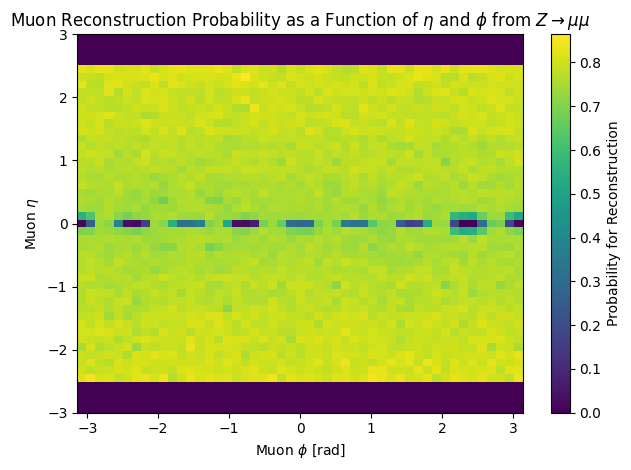

In [34]:
# Convert to numpy arrays
x_matched = ak.to_numpy(matched_phi) 
y_matched = ak.to_numpy(matched_eta)

x_all = ak.to_numpy(selected_phi) 
y_all = ak.to_numpy(selected_eta)

# Define bins
x_bin = np.linspace(-np.pi, np.pi, 2*25) # 48 bins from -pi to pi
y_bin = np.linspace(-3, 3, 2*25)  # 48 bins from -3 to 3 (bin width = 0.125)

# 2D histograms: returns counts in each bin
matched_counts, _, _ = np.histogram2d(x_matched, y_matched, bins=[x_bin, y_bin])
all_counts, _, _     = np.histogram2d(x_all, y_all, bins=[x_bin, y_bin])

# Compute probability
with np.errstate(divide='ignore', invalid='ignore'):
    probability = np.true_divide(matched_counts, all_counts)
    probability[~np.isfinite(probability)] = 0  # set NaN and inf to 0

# Plot the histogram
X, Y = np.meshgrid(x_bin, y_bin, indexing='ij')  # mesh for pcolormesh

pcm = plt.pcolormesh(X, Y, probability, cmap='viridis', shading='auto')
plt.colorbar(pcm, label="Probability for Reconstruction")
plt.xlabel("Muon $\phi$ [rad]")
plt.ylabel("Muon $\eta$")
plt.title(r"Muon Reconstruction Probability as a Function of $\eta$ and $\phi$ from $Z \to \mu\mu$")
plt.tight_layout()
plt.show()

🤔 **What do you notice here?** Take a look at this plot, and try to think about what it means to you. Write down any features of this plot that you see, and try to think about what they mean and what this plot is showing. What do you think the blue line means? Once you're ready, click below to reveal the important features of this plot.

<p>

<details>

<summary>📌 <b>Click to reveal answer</b></summary>

Just as before, this plot tells us the probability that our detector can reconstruct a muon for each bin. The bright spots show areas with high probabilities (the conditions you are most likely to reconstruct a particle), and the dark spots show areas with low probabilities (the conditions you are most unlikely to reconstruct a particle). These dark spots are often called the "holes" of the detector.

In the regions where $|\eta| > 2.5$, the probability is zero since it cannot detect and reconstruct particles in this range. We again see a line along the $\eta = 0$ axis. This is again due to cables that run through the detector in this area, and so we are limited to the number of sensors we can put within this area.

</details>

🎉 **Congratulations!** You have found the acceptance and efficiency of the detector for $Z \rightarrow \mu \mu$, and gained some insight as to why these are important parameters for particle physicists to know!

## Case Study 2: New Physics Searches

The concepts of acceptance and efficiency are also applied in many measurements and searches for new particles. When searching for new particles, we construct "signal regions", regions that are meant to select as many events with new particles as possible, while at the same time selecting as few [Standard Model](https://opendata.atlas.cern/docs/documentation/introduction/SM_and_beyond) events as possible. It's useful to again think about the acceptance of the signal region (how many new physics events would be found in the signal region if the detector were perfect) and the efficiency (what the impact of the detector is on the number of events found in the signal region). Often the dependence of the acceptance and efficiency on the parameters of the model are important.

Here, for example, is the acceptance for an [ATLAS search for Supersymmetry](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2018-25):

<CENTER><img src="https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2018-25/figaux_01d.png" style="width:80%"></CENTER>

Each number represents one possible model of new physics, with particular masses for the new particles. All the points are similar models; the differences between the points are the masses of the new particles. In the bottom right region of the figure, the acceptance is over 50%, meaning that more than half of the events would be found in the signal region in those scenarios. In the upper left region of the figure, the acceptance is below 1%, meaning that less than one in 100 of the signal events would be found in the signal region. It is reasonable to assume that the models in the bottom right region of the figure can be found with the available data, and the models in the upper left region would be very difficult to find.

For the same search, here is the acceptance times the efficiency:

<CENTER><img src="https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2018-25/figaux_02d.png" style="width:80%"></CENTER>

Here the values are never more than about 2%. Of the 50 events that could be found in the signal region, the detector only reconstructs about one of them correctly. This was expected, because this particular search struggles with particles that are very difficult to reconstruct (called _charm hadrons_), which make the search much more difficult!

### Surprisingly high efficiency

In real searches (and even in some simple situations), the efficiency can be surprising. Here is an example of the efficiency from another [ATLAS search for Supersymmetry](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2023-22/):

<CENTER><img src="https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2023-22/figaux_08c.png" style="width:80%"></CENTER>

The setup here is similar, with each number showing the efficiency for a particular configuration of a new physics model with specific masses for the new particles. Here, notice that the efficiency is over 1 for many of the model points, meaning that the efficiency is over 100%! That seems surprising, and requires some thought to understand. Let's consider a simple analogy. Let's say that typically 10% of the cars on a road are white, and you want to count the number of white cars in the next 100. If you have perfect efficiency, and there are 10 white cars, you’ll find 10 white cars. Now suppose that you can always correctly identify a white car, but now half the time you see a blue car you accidentally count it as white. Then you could count *more* than 10 white cars, when there are only 10 in reality. That would produce an efficiency over 100%.

In a similar way, our detector sometimes makes mistakes that make more signal events than expected turn up in the signal region. In some sense, that’s nice to have — we have more signal in our signal region, and we have an easier time finding new particles than we would if the detector was perfect. In practice, that usually comes with larger backgrounds (larger numbers of Standard Model events), which make the searches more difficult.

### Reading results

Many of the papers that you might read in high energy particle physics will provide, either directly in the paper or in "auxilliary material" released with the paper, the acceptance and efficiency of the analysis. Understanding these numbers can be a big help towards understanding the results, and why they look the way they do. They can help you disentangle what is caused by the choices made in the design of the analysis (the acceptance) and what is caused by the detector itself (the efficiency).